In [172]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ast
import folium
from folium import plugins
import polyline
import os
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
#from plotly.offline import plotly as py
#from plotly.offline import graph_objs as go
#import plotly.plotly as py
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
from src.data import make_dataset, data_helpers
from src.visualization import visualize
from dotenv import find_dotenv, load_dotenv
import os
import datetime


%matplotlib inline
width = 10
height = 10
matplotlib.rcParams['figure.figsize'] = [width, height]
matplotlib.rcParams.update({'font.size': 14})

# import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('default')

(strava_data, drive_morning, drive_evening) = make_dataset.load_data()
(morning_commutes, evening_commutes) = data_helpers.split_morning_evening(strava_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
morning_commutes = morning_commutes.drop(morning_commutes.index[1])

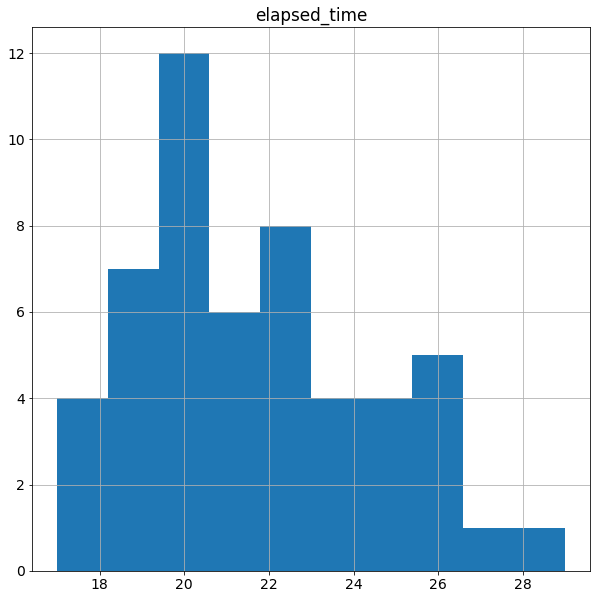

In [73]:
to_plot = visualize.prepare_for_plotting(evening_commutes)#ind = pd.Series(evening_commutes.index)

to_plot[['elapsed_time']].hist()


In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
to_plot = visualize.prepare_for_plotting(morning

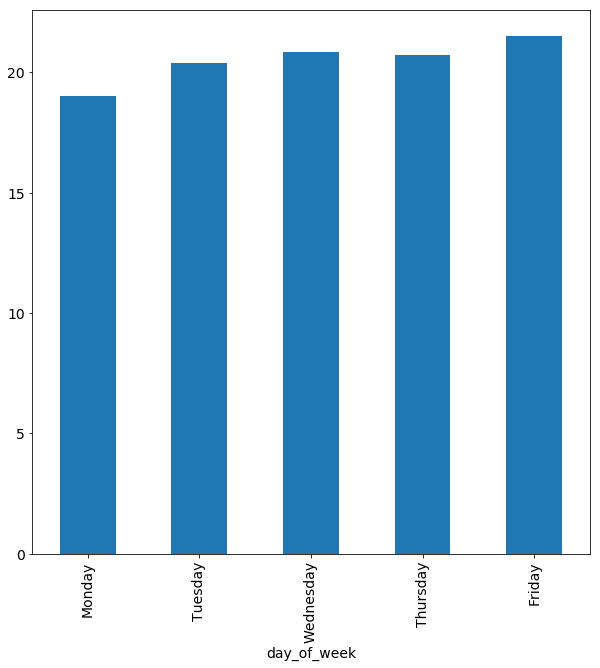

In [122]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
to_plot = visualize.prepare_for_plotting(drive_evening)
to_plot['weekdays'] = to_plot['start_date_local'].dt.weekday_name
to_plot = (to_plot.groupby('weekdays').mean())
to_plot['day_of_week'] = pd.Categorical(to_plot.index, categories=day_order, ordered=True)
to_plot = to_plot.dropna()
to_plot = to_plot.set_index('day_of_week').sort_index()
to_plot['elapsed_time'].plot(kind='bar', color='C0')

In [127]:
drive_evening['start_date_local'].groupby(pd.Grouper(freq='M'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

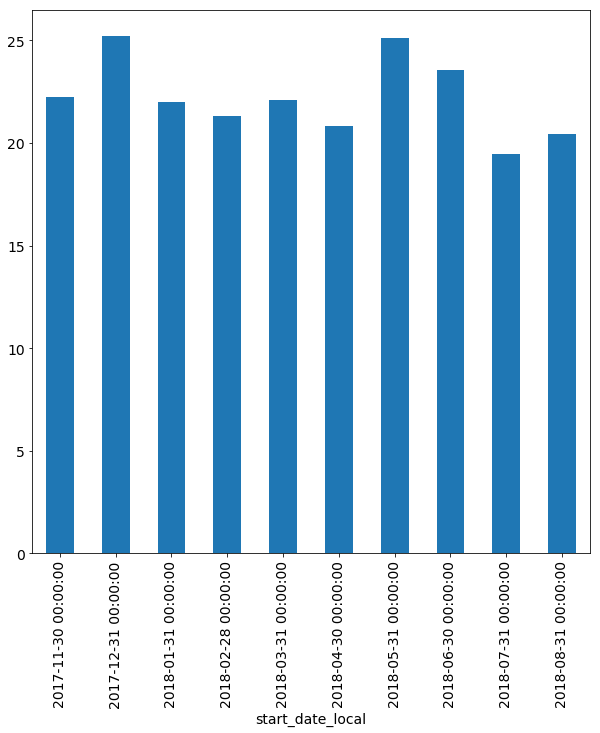

In [171]:
to_plot = visualize.prepare_for_plotting(evening_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).mean())
to_plot['elapsed_time'].plot(kind='bar', color='C0')

In [147]:
to_plot = visualize.prepare_for_plotting(evening_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).size())

In [148]:
to_plot

start_date_local
2017-11-30    7
2017-12-31    2
2018-01-31    4
2018-02-28    7
2018-03-31    3
2018-04-30    5
2018-05-31    4
2018-06-30    4
2018-07-31    9
2018-08-31    7
Freq: M, dtype: int64

In [149]:
to_plot = visualize.prepare_for_plotting(morning_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).size())

/home/greg/miniconda3/envs/commute_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [219]:
morning_commutes.loc[:, 'date'] = morning_commutes['start_date_local'].dt.date
evening_commutes.loc[:, 'date'] = evening_commutes['start_date_local'].dt.date
morning_commutes = morning_commutes.set_index('date')
evening_commutes = evening_commutes.set_index('date')
time_between = pd.DataFrame((evening_commutes['start_date_local'].subtract(morning_commutes['start_date_local'])).dropna())
time_between.rename(columns= {"start_date_local" : 'timediff'}, inplace=True)

In [ ]:
time_between.loc[:, 'timediff'] = 

TypeError: invalid type promotion

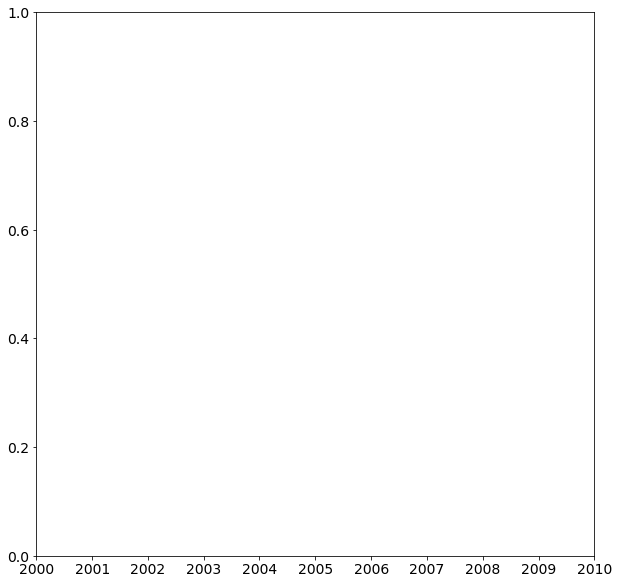

In [222]:
plt.scatter(x=time_between.index, y=time_between['timediff'])

In [227]:
time_between.index.to_pydatetime()

AttributeError: 'Index' object has no attribute 'to_pydatetime'

In [229]:
time_between.index.to_series().to_pydatetime()

AttributeError: 'Series' object has no attribute 'to_pydatetime'

In [218]:
time_between

,start_date_local
date,
2017-11-14,08:48:27
2017-11-16,08:32:44
2017-12-07,07:17:28
2017-12-14,07:48:49
2018-01-10,07:06:14
2018-01-23,09:11:23
2018-01-24,07:22:25
2018-01-30,09:17:33
2018-02-01,09:14:02
